# Structure Optimization

In [1]:
%matplotlib notebook
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
from potentials import *
from distances import *
from sampling import *

<IPython.core.display.Javascript object>


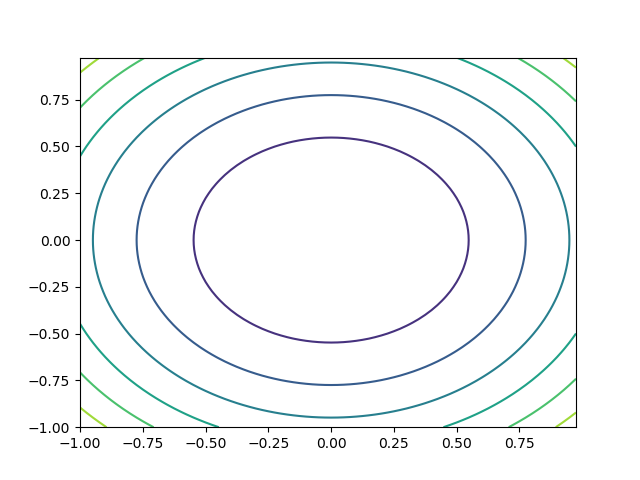

In [3]:
import matplotlib
import matplotlib.cm as cm

delta = 0.025
x = np.arange(-1.0, 1.0, delta)
y = np.arange(-1.0, 1.0, delta)
X, Y = np.meshgrid(x, y)
XY = np.append(X[:, :, None], Y[:, :, None], axis=-1)
Z = potentials.harmonic(XY)

fig, ax = plt.subplots()
ax.contour(X, Y, Z)
#ax.clabel(CS, inline=1, fontsize=10)
#ax.set_title('Simplest default with labels')

In [ ]:
#xinit = np.array([[1., 1], [-1, 2]])
#x = xinit
#x1 = x * 0.5
#print(x1)
#x = np.append(x[None, :, :], x1[None, :, :], axis=0)
#print(x)
#print(x[-1])
#x1 = x[-1] * 0.5
#print(x1)
#x = np.append(x,  x1[None, :, :], axis=0)
#print(x)

In [4]:
def descent( x, a=1e-4, prec=1e-10, maxst=1e6 ):
    """Gradient Descent
    
    Arguments:
        x    (float): position vectors (dim = n x 3)
        a    (float): 'learning rate' alpha = 1e-4
        prec (float): difference between steps, precision = 1e-10
        maxst  (int): max # of steps, maxst = 1e6
    
    Output:
        x: position array,
        step: # of steps needed to converge"""
    
    x = x[None, :, :]
    step = 0
    f = gradients.harmonic( x[-1] )
    x1 = x[-1] - a * f
    
    while(step < maxst and (abs(x[-1] - x1) > prec).all()):
        x = np.append(x, x1[None, :, :], axis=0)
        f = gradients.harmonic( x[-1] )
        x1 = x[-1] - a * f
        step += 1
        
    return x, step

In [5]:
x_init = np.array([[.8, .9], [.2, .3]])
positions, nsteps = descent(x_init, 1e-3)
print(nsteps, positions.shape)
print(positions[-1])

14502 (14503, 2, 2)
[[3.99760832e-07 4.49730936e-07]
 [9.99402080e-08 1.49910312e-07]]


<IPython.core.display.Javascript object>


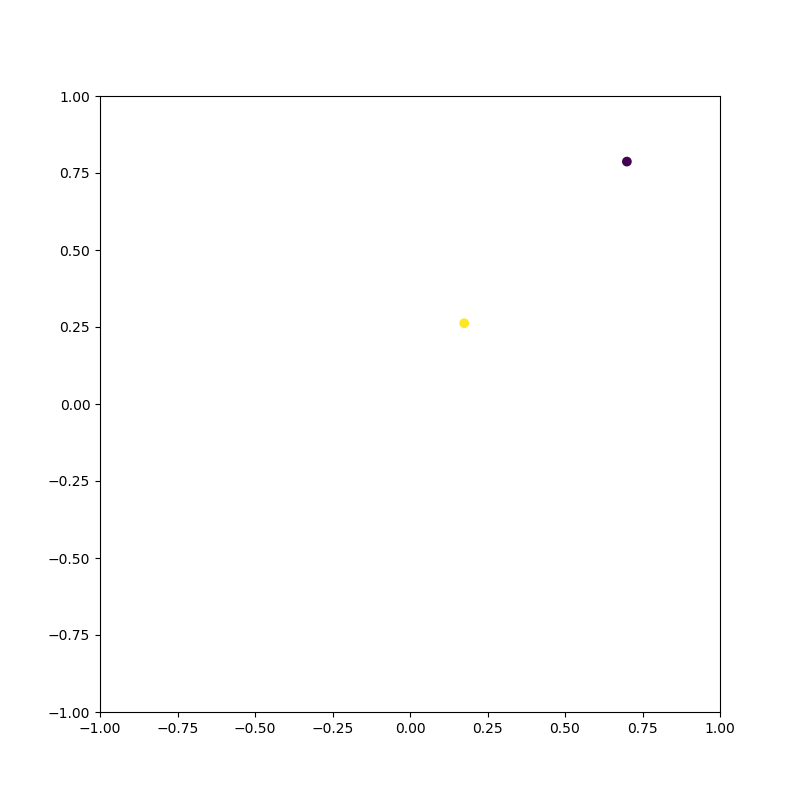

In [6]:
from matplotlib import animation


import matplotlib.cm as cm
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
XY = np.append(X[:, :, None], Y[:, :, None], axis=-1)
Z = potentials.harmonic(XY)
fig, ax = plt.subplots(figsize=(8, 8))
ax.contour(X, Y, Z)


#fig, ax = plt.subplots(figsize=(8, 8))
colors = np.arange(len(x_init))
scat = ax.scatter(x_init[:,0], x_init[:,1], c=colors)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
def animate(i):
    index = i
    data = positions[index]
    scat.set_offsets(data)
    ax.contour(X, Y, Z)
    return scat,

#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=25, bitrate=1800)
anim = animation.FuncAnimation(fig, animate, interval=80)#, frames=750, repeat=False)
#anim.save('LJ_Harmonic_Particles.mp4', writer=writer)

<IPython.core.display.Javascript object>


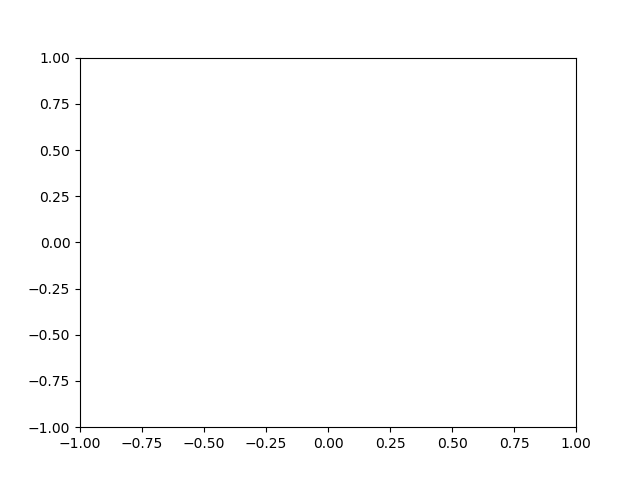

In [53]:
"""
Matplotlib Animation Example

author: Jake Vanderplas
"""

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-1, 1), ylim=(-1, 1))
line, = ax.plot([], [], lw=2)
ax.contour(X, Y, Z)

# initialization function: plot the background of each frame
def init():
    particles.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = positions[i, :, 0]
    y = positions[i, :, 1]
    particles.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
#anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

In [18]:
print(np.linspace(-2, 2, 1000))

[-2.         -1.995996   -1.99199199 -1.98798799 -1.98398398 -1.97997998
 -1.97597598 -1.97197197 -1.96796797 -1.96396396 -1.95995996 -1.95595596
 -1.95195195 -1.94794795 -1.94394394 -1.93993994 -1.93593594 -1.93193193
 -1.92792793 -1.92392392 -1.91991992 -1.91591592 -1.91191191 -1.90790791
 -1.9039039  -1.8998999  -1.8958959  -1.89189189 -1.88788789 -1.88388388
 -1.87987988 -1.87587588 -1.87187187 -1.86786787 -1.86386386 -1.85985986
 -1.85585586 -1.85185185 -1.84784785 -1.84384384 -1.83983984 -1.83583584
 -1.83183183 -1.82782783 -1.82382382 -1.81981982 -1.81581582 -1.81181181
 -1.80780781 -1.8038038  -1.7997998  -1.7957958  -1.79179179 -1.78778779
 -1.78378378 -1.77977978 -1.77577578 -1.77177177 -1.76776777 -1.76376376
 -1.75975976 -1.75575576 -1.75175175 -1.74774775 -1.74374374 -1.73973974
 -1.73573574 -1.73173173 -1.72772773 -1.72372372 -1.71971972 -1.71571572
 -1.71171171 -1.70770771 -1.7037037  -1.6996997  -1.6956957  -1.69169169
 -1.68768769 -1.68368368 -1.67967968 -1.67567568 -1

In [49]:
print(positions[0])
print(positions[0, :, 1])

[[0.8 0.9]
 [0.2 0.3]]
[0.9 0.3]
